In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model
import plan_utils
%matplotlib inline

np.random.seed(1) # set a seed so that the results are consistent

The shape of X is: (2, 400)
The shape of Y is: (1, 400)
I have m = 400 training examples!


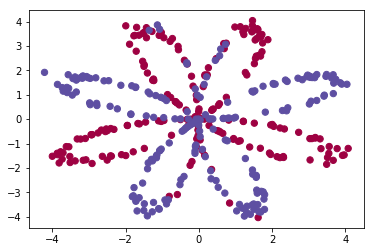

In [2]:
def load_planar_dataset():
    np.random.seed(1)
    m = 400 # 样本数量
    N = int(m/2) # 每个类别的样本量
    D = 2 # 维度数
    X = np.zeros((m,D)) # 初始化X
    Y = np.zeros((m,1), dtype='uint8') # 初始化Y
    a = 4 # 花儿的最大长度

    for j in range(2):
        ix = range(N*j,N*(j+1))
        t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
        r = a*np.sin(4*t) + np.random.randn(N)*0.2 # radius
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        Y[ix] = j

    X = X.T
    Y = Y.T

    return X, Y


X, Y = load_planar_dataset()
# Visualize the data:
plt.scatter(X[0, :], X[1, :], c=Y[0,:], s=40, cmap=plt.cm.Spectral);


shape_X = X.shape
shape_Y = Y.shape
m = X.shape[1]  # training set size

print ('The shape of X is: ' + str(shape_X))
print ('The shape of Y is: ' + str(shape_Y))
print ('I have m = %d training examples!' % (m))

Accuracy of logistic regression: 47 % (percentage of correctly labelled datapoints)


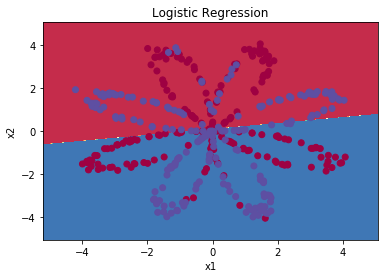

In [3]:
# Train the logistic regression classifier
clf = sklearn.linear_model.LogisticRegressionCV(cv=3);
clf.fit(X.T, Y.T.ravel());

# Plot the decision boundary for logistic regression
plan_utils.plot_decision_boundary(lambda x: clf.predict(x), X, Y.ravel())
plt.title("Logistic Regression")

# Print accuracy
LR_predictions = clf.predict(X.T)
print ('Accuracy of logistic regression: %d ' % float((np.dot(Y,LR_predictions) + np.dot(1-Y,1-LR_predictions))/float(Y.size)*100) +
       '% ' + "(percentage of correctly labelled datapoints)")

In [4]:
# GRADED FUNCTION: layer_sizes

def layer_sizes(X, Y):
    n_x = X.shape[0] # size of input layer
    n_h = 4
    n_y = Y.shape[0]# size of output layer
    return (n_x, n_h, n_y)

In [5]:
# GRADED FUNCTION: initialize_parameters

def initialize_parameters(n_x, n_h, n_y):
    np.random.seed(2) # we set up a seed so that your output matches ours although the initialization is random.

    W1 = np.random.randn(n_h, n_x)
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h)
    b2 = np.zeros((n_y, 1))

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}

    return parameters

In [6]:
# GRADED FUNCTION: forward_propagation

def forward_propagation(X, parameters):
    # Retrieve each parameter from the dictionary "parameters"
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    # Implement Forward Propagation to calculate A2 (probabilities)
    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2 
    A2 = plan_utils.sigmoid(Z2)

    assert(A2.shape == (1, X.shape[1]))

    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}

    return A2, cache

In [7]:
# GRADED FUNCTION: compute_cost

def compute_cost(A2, Y, parameters):
  
    m = Y.shape[1] # number of example

    # Compute the cross-entropy cost
    logprobs = np.multiply(np.log(A2), Y) + np.multiply(np.log(1-A2), (1-Y))
    cost = -(1.0/m)*np.sum(logprobs)

    cost = np.squeeze(cost)     # makes sure cost is the dimension we expect. 
                                # E.g., turns [[17]] into 17 
    assert(isinstance(cost, float))

    return cost          

In [8]:
# GRADED FUNCTION: backward_propagation

def backward_propagation(parameters, cache, X, Y):
   
    m = X.shape[1]

    # First, retrieve W1 and W2 from the dictionary "parameters".
    W1 = parameters["W1"]
    W2 = parameters["W2"]

    # Retrieve also A1 and A2 from dictionary "cache".
    A1 = cache["A1"]
    A2 = cache["A2"]

    # Backward propagation: calculate dW1, db1, dW2, db2. 
    dZ2 = A2 - Y
    dW2 = 1.0/m*np.dot(dZ2, A1.T)
    db2 = 1.0/m*np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.dot(W2.T, dZ2)*(1-np.power(A1, 2))
    dW1 = 1.0/m*np.dot(dZ1, X.T)
    db1 = 1.0/m*np.sum(dZ1, axis=1, keepdims=True)

    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}

    return grads

In [9]:
# GRADED FUNCTION: update_parameters

def update_parameters(parameters, grads, learning_rate = 1.2):
  
    # Retrieve each parameter from the dictionary "parameters"
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    # Retrieve each gradient from the dictionary "grads"
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]

    # Update rule for each parameter
    W1 = W1 - learning_rate*dW1
    b1 = b1 - learning_rate*db1
    W2 = W2 - learning_rate*dW2
    b2 = b2 - learning_rate*db2

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}

    return parameters

In [10]:
# GRADED FUNCTION: nn_model

def nn_model(X, Y, n_h, num_iterations = 10000, print_cost=False):

    np.random.seed(3)
    n_x = layer_sizes(X, Y)[0]  #2
    n_y = layer_sizes(X, Y)[2]  #400

    # Initialize parameters, then retrieve W1, b1, W2, b2. Inputs: "n_x, n_h, n_y". Outputs = "W1, b1, W2, b2, parameters".
    parameters = initialize_parameters(n_x, n_h, n_y)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    # Loop (gradient descent)

    for i in range(0, num_iterations):

        # Forward propagation. Inputs: "X, parameters". Outputs: "A2, cache".
        A2, cache = forward_propagation(X, parameters)

        # Cost function. Inputs: "A2, Y, parameters". Outputs: "cost".
        cost = compute_cost(A2, Y, parameters)

        # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads".
        grads = backward_propagation(parameters, cache, X, Y)

        # Gradient descent parameter update. Inputs: "parameters, grads". Outputs: "parameters".
        parameters = update_parameters(parameters, grads, learning_rate = 1.2)

        # Print the cost every 1000 iterations
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    return parameters

In [11]:
# GRADED FUNCTION: predict

def predict(parameters, X):

    # Computes probabilities using forward propagation, and classifies to 0/1 using 0.5 as the threshold.
    A2, cache = forward_propagation(X, parameters)
    predictions = (A2 > 0.5)

    return predictions

Cost after iteration 0: 1.127380
Cost after iteration 1000: 0.288553
Cost after iteration 2000: 0.276386
Cost after iteration 3000: 0.268077
Cost after iteration 4000: 0.263069
Cost after iteration 5000: 0.259617
Cost after iteration 6000: 0.257070
Cost after iteration 7000: 0.255105
Cost after iteration 8000: 0.253534
Cost after iteration 9000: 0.252245


Text(0.5, 1.0, 'Decision Boundary for hidden layer size 4')

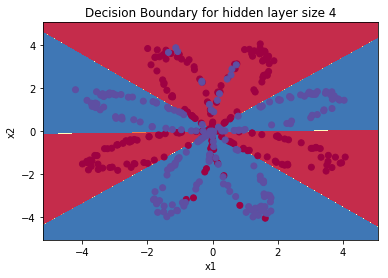

In [12]:
# Build a model with a n_h-dimensional hidden layer
parameters = nn_model(X, Y, n_h = 4, num_iterations = 10000, print_cost=True)

# Plot the decision boundary
plan_utils.plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y.ravel())
plt.title("Decision Boundary for hidden layer size " + str(4))

In [13]:
# Print accuracy
predictions = predict(parameters, X)
print ('Accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')

Accuracy: 91%


Accuracy for 1 hidden units: 61.5 %
Accuracy for 2 hidden units: 68.0 %
Accuracy for 3 hidden units: 66.25 %
Accuracy for 4 hidden units: 90.75 %
Accuracy for 5 hidden units: 91.0 %
Accuracy for 20 hidden units: 92.0 %
Accuracy for 50 hidden units: 90.75 %


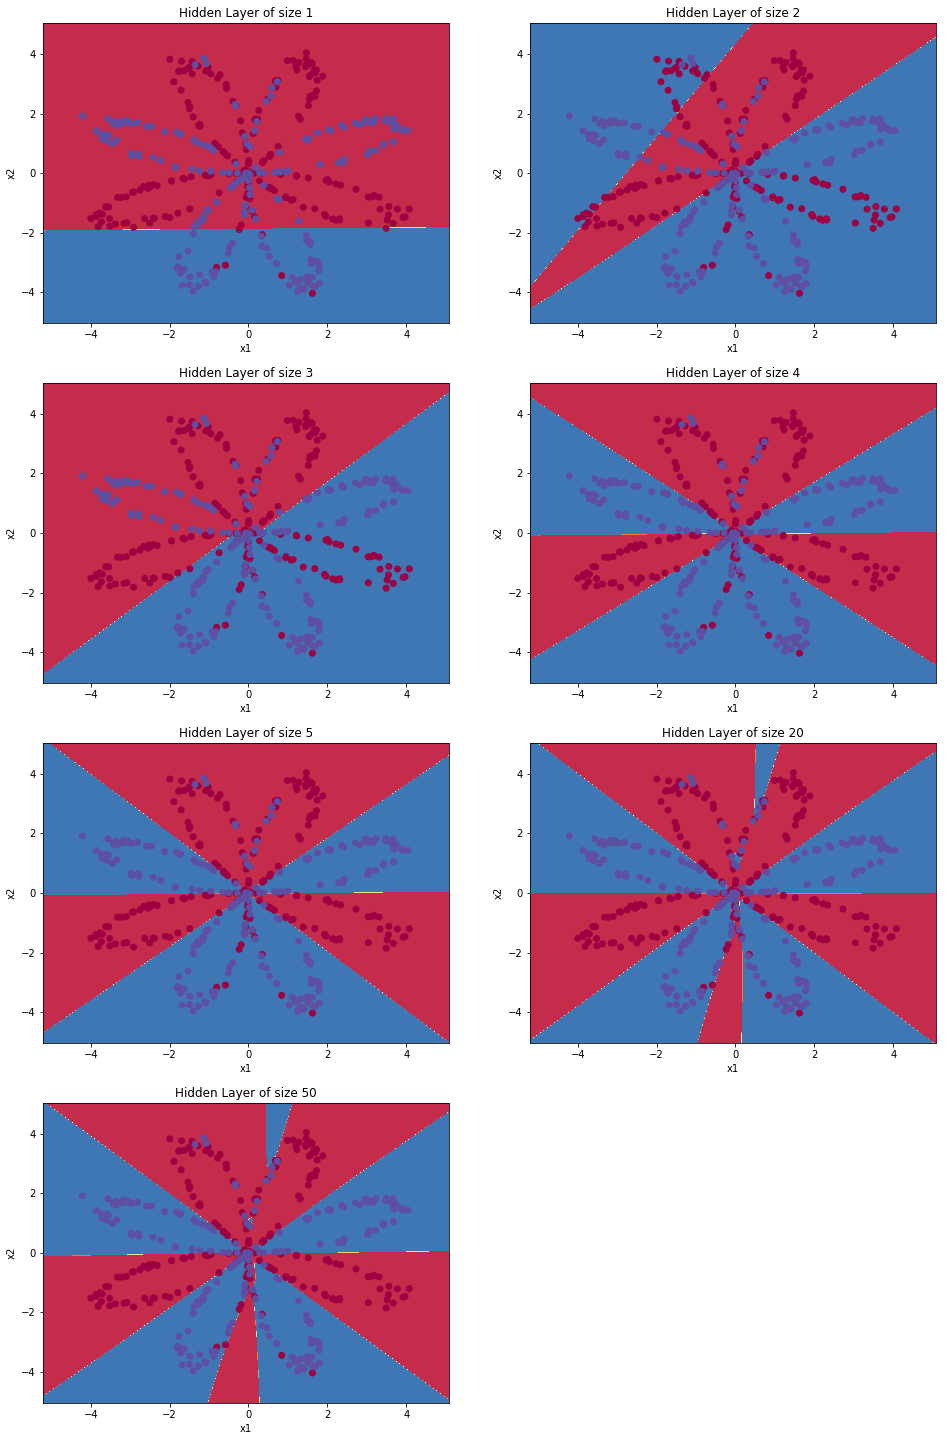

In [14]:
# Different hidden layer size
plt.figure(figsize=(16, 32))
hidden_layer_sizes = [1, 2, 3, 4, 5, 20, 50]
for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer of size %d' % n_h)
    parameters = nn_model(X, Y, n_h, num_iterations = 5000)
    plan_utils.plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y.ravel())
    predictions = predict(parameters, X)
    accuracy = float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100)
    print ("Accuracy for {} hidden units: {} %".format(n_h, accuracy))